In [1]:
import sys
import os

# Add the build directory to Python path
build_dir = os.path.abspath('../')
sys.path.insert(0, build_dir)

import sorters

In [ ]:
sorts = []
for name, obj in sorters.__dict__.items():
    if callable(obj):
        sorts.append(name)

print(sorts)

['adaptive_shivers_sort', 'cartesian_tree_sort', 'counting_sort', 'drop_merge_sort', 'heap_sort', 'insertion_sort', 'mel_sort', 'merge_insertion_sort', 'merge_sort', 'poplar_sort', 'quick_sort', 'quick_merge_sort', 'selection_sort', 'ska_sort', 'slab_sort', 'smooth_sort', 'spin_sort', 'splay_sort', 'spread_sort', 'split_sort', 'std_sort', 'tim_sort', 'verge_sort']


In [45]:
import data.list_generators as lg

sizes = []
for i in range (10, 5000, 100):
    sizes.append(i)

print(sizes)

[10, 110, 210, 310, 410, 510, 610, 710, 810, 910, 1010, 1110, 1210, 1310, 1410, 1510, 1610, 1710, 1810, 1910, 2010, 2110, 2210, 2310, 2410, 2510, 2610, 2710, 2810, 2910, 3010, 3110, 3210, 3310, 3410, 3510, 3610, 3710, 3810, 3910, 4010, 4110, 4210, 4310, 4410, 4510, 4610, 4710, 4810, 4910]


In [46]:
lists = []
for size in sizes:
    lists.append(lg.randomize_list(lg.generate_list(size)))

In [47]:
import benchmark as bc
all_benchmarks = {}

for sort in sorts:
    curr_sorter_benchmarks = []
    for list in lists:
        curr_sorter_benchmarks.append(bc.benchmark_sorter(sort, list))
    
    all_benchmarks[sort] = curr_sorter_benchmarks

In [48]:
import statistics 

for sort, entry in all_benchmarks.items():
    print(f"Benchmarks for {sort}:")
    for i, time in enumerate(entry):
        print(f"  List size: {sizes[i]}, Time: {time:.6f} seconds")
    mean_time = statistics.mean(entry)
    print(f"  Mean time: {mean_time:.6f} seconds")
    print("-" * 30)

total_sum = 0
for sort, entry in all_benchmarks.items():
    total_sum += sum(entry)

print(f"Total sum of all times: {total_sum:.6f} seconds")

Benchmarks for adaptive_shivers_sort:
  List size: 10, Time: 0.000001 seconds
  List size: 110, Time: 0.000006 seconds
  List size: 210, Time: 0.000011 seconds
  List size: 310, Time: 0.000017 seconds
  List size: 410, Time: 0.000037 seconds
  List size: 510, Time: 0.000039 seconds
  List size: 610, Time: 0.000031 seconds
  List size: 710, Time: 0.000270 seconds
  List size: 810, Time: 0.000033 seconds
  List size: 910, Time: 0.000072 seconds
  List size: 1010, Time: 0.000037 seconds
  List size: 1110, Time: 0.000038 seconds
  List size: 1210, Time: 0.000040 seconds
  List size: 1310, Time: 0.000043 seconds
  List size: 1410, Time: 0.000046 seconds
  List size: 1510, Time: 0.000050 seconds
  List size: 1610, Time: 0.000051 seconds
  List size: 1710, Time: 0.000056 seconds
  List size: 1810, Time: 0.000061 seconds
  List size: 1910, Time: 0.000064 seconds
  List size: 2010, Time: 0.000072 seconds
  List size: 2110, Time: 0.000064 seconds
  List size: 2210, Time: 0.000067 seconds
  List 

In [43]:
for sort, entry in all_benchmarks.items():
    print(f"Average time for {sort} on list of size 10000: {entry[3]:.6f} seconds")

sorted_benchmarks = sorted(all_benchmarks.items(), key=lambda item: sum(item[1]), reverse=True)

Average time for adaptive_shivers_sort on list of size 10000: 0.000002 seconds
Average time for cartesian_tree_sort on list of size 10000: 0.000001 seconds
Average time for counting_sort on list of size 10000: 0.000001 seconds
Average time for drop_merge_sort on list of size 10000: 0.000001 seconds
Average time for heap_sort on list of size 10000: 0.000001 seconds
Average time for insertion_sort on list of size 10000: 0.000001 seconds
Average time for mel_sort on list of size 10000: 0.000001 seconds
Average time for merge_insertion_sort on list of size 10000: 0.000002 seconds
Average time for merge_sort on list of size 10000: 0.000001 seconds
Average time for poplar_sort on list of size 10000: 0.000001 seconds
Average time for quick_sort on list of size 10000: 0.000001 seconds
Average time for quick_merge_sort on list of size 10000: 0.000001 seconds
Average time for selection_sort on list of size 10000: 0.000001 seconds
Average time for ska_sort on list of size 10000: 0.000001 seconds


In [49]:
sorted_benchmarks = sorted(all_benchmarks.items(), key=lambda item: sum(item[1]))
for sort, entry in sorted_benchmarks:
    print(f"Average time for {sort} on list of size 10000: {entry[3]:.6f} seconds")

Average time for counting_sort on list of size 10000: 0.000005 seconds
Average time for verge_sort on list of size 10000: 0.000006 seconds
Average time for spread_sort on list of size 10000: 0.000006 seconds
Average time for split_sort on list of size 10000: 0.000006 seconds
Average time for std_sort on list of size 10000: 0.000006 seconds
Average time for ska_sort on list of size 10000: 0.000008 seconds
Average time for drop_merge_sort on list of size 10000: 0.000007 seconds
Average time for quick_sort on list of size 10000: 0.000006 seconds
Average time for spin_sort on list of size 10000: 0.000006 seconds
Average time for quick_merge_sort on list of size 10000: 0.000007 seconds
Average time for merge_sort on list of size 10000: 0.000006 seconds
Average time for heap_sort on list of size 10000: 0.000007 seconds
Average time for mel_sort on list of size 10000: 0.000009 seconds
Average time for cartesian_tree_sort on list of size 10000: 0.000008 seconds
Average time for tim_sort on lis

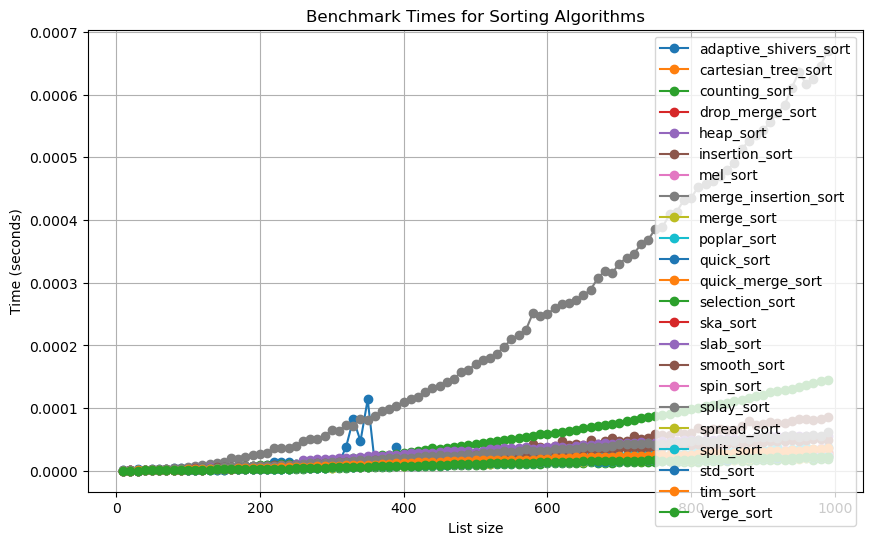

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for sort, times in all_benchmarks.items():
    plt.plot(sizes, times, marker='o', label=sort)

plt.xlabel('List size')
plt.ylabel('Time (seconds)')
plt.title('Benchmark Times for Sorting Algorithms')
plt.legend()
plt.grid(True)
plt.show()